## tensorflow 설치

In [1]:
!pip install --user --upgrade tensorflow

## 설치 확인

In [12]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000,1000])))

tf.Tensor(1181.6401, shape=(), dtype=float32)


## numpy  
[ ]수로 차원 파악

In [35]:
import numpy as np

a = np.array([1,2,3,4]) + np.array([1,3,5,6])
print(type(a))
print(a.ndim)
x = np.array(12)
print(x.ndim)
y = np.array([12])
print(y.ndim)
z = np.array([[10],[10]])
print(z.ndim)
az = np.array([[[[10],[10]]]])
print(az.ndim)

<class 'numpy.ndarray'>
1
0
1
2
4


In [38]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [42]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [44]:
train_images.shape

(60000, 28, 28)

In [45]:
train_images.dtype

dtype('uint8')

In [62]:
digit = train_images[4]

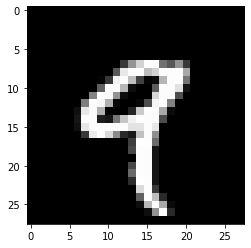

In [63]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')
plt.show()

In [68]:
my_slice = train_images[11:101]
my_slice.shape

(90, 28, 28)

In [85]:
#오른쪽 하단부
my_slice = train_images[:10,14:,14:]
my_slice.shape

(10, 14, 14)

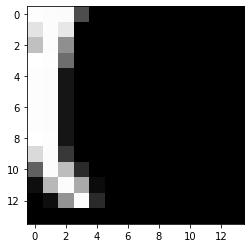

In [86]:
plt.imshow(my_slice[4], cmap='gray')
plt.show()

## 배치 데이터

In [87]:
batch = train_images[:128]

In [88]:
batch = train_images[128:256]

In [91]:
# n번째 배치
n=1
batch = train_images[128*n:128*(n+1)]

### 2차원: 벡터 데이터  
(samples, features)  
### 3차원: 시계열 데이터, sequence data  
(samples, timesteps, features)  
### 4차원: 영상  
(samples, height, width, channels), (samples, channels,height, width)  
channel last (128, 256, 256, 3) --> tensorflow / channels 0: gray, 3: color  
channel first (128, 3, 256, 256) --> pytorch, Theano  
channel first or last  
### 5차원: 동영상  
(samples, frames, height, width, channels)  
(4, 240, 144, 256, 3)

## 회귀 분석  
y = wx에서 최적의 w를 찾는 것  


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

In [100]:
공부시간 = np.array([1,2,3,4,5,6])
점수     = np.array([10,21,30,40,51,60])

In [103]:
model = Sequential()
# 출력값 하나, 입력값 하나, 활성화함수는 linear
model.add(Dense(1, input_dim = 1, activation = 'linear'))

In [107]:
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [109]:
model.fit(공부시간, 점수, epochs = 100, batch_size=1, shuffle=False)

Epoch 1/100
6/6 [==============================] - 0s 998us/step - loss: 544.8582 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 997us/step - loss: 2.5700 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 798us/step - loss: 1.4863 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 798us/step - loss: 1.4754 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 799us/step - loss: 1.4269 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 1ms/step - loss: 1.3782 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 598us/step - loss: 1.3315 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 798us/step - loss: 1.2869 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 997us/step - loss: 1.2443 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 798us/step - loss:

6/6 [==============================] - 0s 798us/step - loss: 0.3704 - accuracy: 0.0000e+00
Epoch 81/100
6/6 [==============================] - 0s 798us/step - loss: 0.3688 - accuracy: 0.0000e+00
Epoch 82/100
6/6 [==============================] - 0s 598us/step - loss: 0.3672 - accuracy: 0.0000e+00
Epoch 83/100
6/6 [==============================] - 0s 598us/step - loss: 0.3657 - accuracy: 0.0000e+00
Epoch 84/100
6/6 [==============================] - 0s 997us/step - loss: 0.3642 - accuracy: 0.0000e+00
Epoch 85/100
6/6 [==============================] - 0s 798us/step - loss: 0.3629 - accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 798us/step - loss: 0.3615 - accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 599us/step - loss: 0.3603 - accuracy: 0.0000e+00
Epoch 88/100
6/6 [==============================] - 0s 798us/step - loss: 0.3590 - accuracy: 0.0000e+00
Epoch 89/100
6/6 [==============================] - 0s 798us/step - loss: 0.3

In [114]:
print('예측결과:', model.predict([7]))
print('파라미터수:',model.count_params())

예측결과: [[70.03651]]
파라미터수: 2


In [145]:
from tensorflow.keras.datasets import boston_housing

In [146]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [187]:
train_data.shape

(404, 13)

In [200]:
model = Sequential()
model.add(Dense(64, activation = 'linear',input_shape=(train_data.shape[1],)))
model.add(Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

### 데이터 스케일링

In [191]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [192]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [194]:
train_data.mean()

2.602301889250862e-15

In [195]:
train_data.std()

0.9999999999999994

In [201]:
model.fit(train_data, train_targets, epochs = 100, batch_size=1, shuffle=False)

Epoch 1/100
404/404 [==============================] - 0s 497us/step - loss: 243.4131 - accuracy: 0.0000e+00
Epoch 2/100
404/404 [==============================] - 0s 495us/step - loss: 39.2965 - accuracy: 0.0000e+00
Epoch 3/100
404/404 [==============================] - 0s 483us/step - loss: 29.0095 - accuracy: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 0s 626us/step - loss: 25.1391 - accuracy: 0.0000e+00
Epoch 5/100
404/404 [==============================] - 0s 535us/step - loss: 22.7592 - accuracy: 0.0000e+00
Epoch 6/100
404/404 [==============================] - 0s 525us/step - loss: 20.8122 - accuracy: 0.0000e+00
Epoch 7/100
404/404 [==============================] - 0s 557us/step - loss: 19.3697 - accuracy: 0.0000e+00
Epoch 8/100
404/404 [==============================] - 0s 502us/step - loss: 18.3285 - accuracy: 0.0000e+00
Epoch 9/100
404/404 [==============================] - 0s 460us/step - loss: 17.4414 - accuracy: 0.0000e+00
Epoch 10/100
404/404 [=====

404/404 [==============================] - 0s 530us/step - loss: 7.7088 - accuracy: 0.0000e+00
Epoch 77/100
404/404 [==============================] - 0s 488us/step - loss: 7.7037 - accuracy: 0.0000e+00
Epoch 78/100
404/404 [==============================] - 0s 463us/step - loss: 7.6855 - accuracy: 0.0000e+00
Epoch 79/100
404/404 [==============================] - 0s 480us/step - loss: 7.6807 - accuracy: 0.0000e+00
Epoch 80/100
404/404 [==============================] - 0s 488us/step - loss: 7.6859 - accuracy: 0.0000e+00
Epoch 81/100
404/404 [==============================] - 0s 525us/step - loss: 7.6502 - accuracy: 0.0000e+00
Epoch 82/100
404/404 [==============================] - 0s 483us/step - loss: 7.6506 - accuracy: 0.0000e+00
Epoch 83/100
404/404 [==============================] - 0s 515us/step - loss: 7.6629 - accuracy: 0.0000e+00
Epoch 84/100
404/404 [==============================] - 0s 480us/step - loss: 7.6325 - accuracy: 0.0000e+00
Epoch 85/100
404/404 [===================

In [202]:
model.evaluate(test_data, test_targets, verbose=0)

[22.017425537109375, 0.0]

In [203]:
print('예측결과:\n', model.predict(test_data))
print('파라미터수:',model.count_params())

예측결과:
 [[11.624617 ]
 [19.467113 ]
 [21.50925  ]
 [30.574669 ]
 [24.271358 ]
 [22.781782 ]
 [27.295559 ]
 [23.119232 ]
 [21.154215 ]
 [20.974445 ]
 [18.723974 ]
 [17.484009 ]
 [16.923923 ]
 [41.720154 ]
 [21.767406 ]
 [18.700068 ]
 [24.541004 ]
 [20.219637 ]
 [21.19611  ]
 [29.129726 ]
 [13.884941 ]
 [18.107233 ]
 [21.981897 ]
 [13.696484 ]
 [15.386925 ]
 [25.05684  ]
 [29.013748 ]
 [24.387722 ]
 [14.7021885]
 [19.981411 ]
 [21.434755 ]
 [18.676807 ]
 [33.659374 ]
 [23.462883 ]
 [17.36233  ]
 [ 9.743288 ]
 [18.464348 ]
 [20.528576 ]
 [19.996542 ]
 [23.52358  ]
 [28.34068  ]
 [28.004568 ]
 [15.441414 ]
 [44.199726 ]
 [28.426147 ]
 [25.242277 ]
 [27.71256  ]
 [19.165361 ]
 [27.306503 ]
 [22.985348 ]
 [32.36444  ]
 [19.140438 ]
 [13.492413 ]
 [15.706901 ]
 [34.59043  ]
 [27.97668  ]
 [13.967425 ]
 [47.082462 ]
 [34.017513 ]
 [22.711946 ]
 [24.398108 ]
 [17.178347 ]
 [17.784128 ]
 [20.586306 ]
 [23.841446 ]
 [16.884417 ]
 [16.06903  ]
 [20.538881 ]
 [16.502617 ]
 [ 9.941483 ]
 [27.585684 ]